## Langkah 1: Contoh Sederhana dengan Dummy Data

Dataset sederhana dengan 2 fitur: luas dan harga.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Contoh dataset (dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

print("Dataset sederhana:")
print(data)

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print(f"\nTrain size: {len(X_train)}, Test size: {len(X_test)}")

Dataset sederhana:
   luas  harga
0    50    500
1    60    600
2    70    700
3    80    800
4    90    900

Train size: 4, Test size: 1


In [2]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
print("Model architecture:")
model.summary()

# Training
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluasi
predictions = model.predict(X_test)
print("\nPrediksi (normalized):", predictions.flatten())

# Denormalisasi untuk melihat hasil asli
predictions_original = scaler_y.inverse_transform(predictions)
y_test_original = scaler_y.inverse_transform(y_test)
print("\nPrediksi (harga asli):", predictions_original.flatten())
print("Actual (harga asli):", y_test_original.flatten())

Model architecture:


l:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Prediksi (normalized): [-0.4289603]

Prediksi (harga asli): [639.3359]
Actual (harga asli): [600.]

Prediksi (normalized): [-0.4289603]

Prediksi (harga asli): [639.3359]
Actual (harga asli): [600.]


## Tugas 4: Eksperimen dengan Learning Rate

Ubah learning rate dan bandingkan hasil loss.

EKSPERIMEN: Variasi Learning Rate

--- Learning Rate: 0.001 ---


l:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Loss: 0.041102

--- Learning Rate: 0.01 ---
Final Loss: 0.002810

--- Learning Rate: 0.1 ---
Final Loss: 0.002810

--- Learning Rate: 0.1 ---
Final Loss: 0.000010
Final Loss: 0.000010


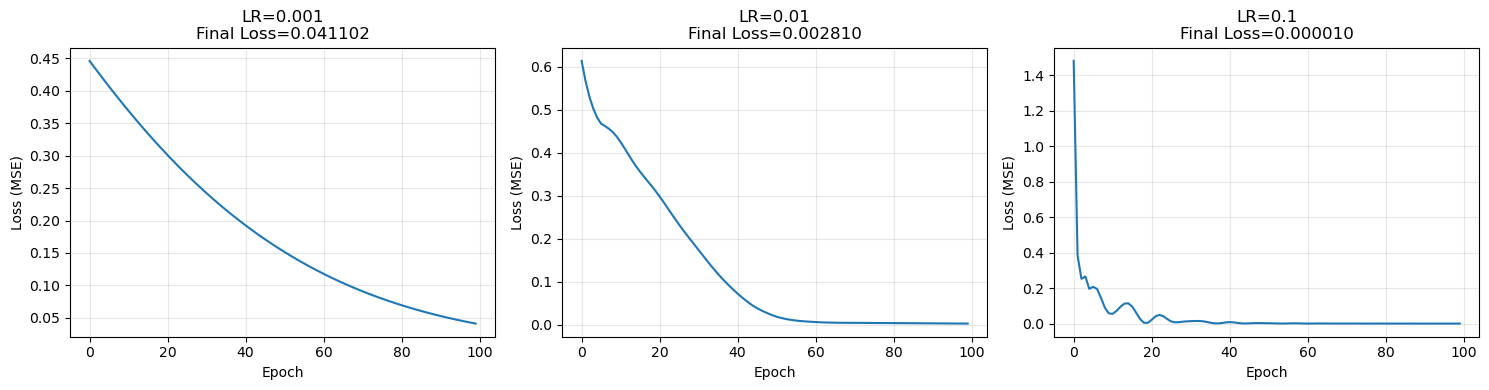


PERBANDINGAN HASIL
Learning Rate 0.001: Final Loss = 0.041102
Learning Rate 0.01: Final Loss = 0.002810
Learning Rate 0.1: Final Loss = 0.000010

Best Learning Rate: 0.1 (Loss: 0.000010)


In [3]:
print("="*60)
print("EKSPERIMEN: Variasi Learning Rate")
print("="*60)

learning_rates = [0.001, 0.01, 0.1]
results = []

fig, axes = plt.subplots(1, len(learning_rates), figsize=(15, 4))

for idx, lr in enumerate(learning_rates):
    print(f"\n--- Learning Rate: {lr} ---")
    
    # Build model
    model_lr = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    
    # Compile dengan learning rate yang berbeda
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model_lr.compile(optimizer=optimizer, loss='mse')
    
    # Train
    history_lr = model_lr.fit(X_train, y_train, epochs=100, verbose=0)
    
    # Evaluate
    final_loss = history_lr.history['loss'][-1]
    print(f"Final Loss: {final_loss:.6f}")
    
    results.append({
        'learning_rate': lr,
        'final_loss': final_loss,
        'history': history_lr.history['loss']
    })
    
    # Plot
    axes[idx].plot(history_lr.history['loss'])
    axes[idx].set_title(f'LR={lr}\nFinal Loss={final_loss:.6f}')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Loss (MSE)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*60)
print("PERBANDINGAN HASIL")
print("="*60)
for res in results:
    print(f"Learning Rate {res['learning_rate']}: Final Loss = {res['final_loss']:.6f}")
print("="*60)

best_lr = min(results, key=lambda x: x['final_loss'])
print(f"\nBest Learning Rate: {best_lr['learning_rate']} (Loss: {best_lr['final_loss']:.6f})")

## Langkah 2: MLP Regresi dengan Dataset Boston Housing

Dataset Boston digunakan untuk memprediksi harga rumah berdasarkan berbagai fitur.

**Note**: Dataset Boston deprecated di scikit-learn versi terbaru. Kita akan menggunakan alternatif atau load dari sumber lain.

In [4]:
# MLP regresi (Keras) dengan Boston Housing Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load Boston dataset (menggunakan alternatif karena deprecated)
# Dataset Boston Housing: https://www.kaggle.com/c/boston-housing
# Fitur: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
# Target: MEDV (median value of homes)

try:
    from sklearn.datasets import load_boston
    print("Loading Boston dataset from sklearn...")
    data = load_boston()
    X = data.data
    y = data.target
    feature_names = data.feature_names
except:
    # Alternatif: buat dummy data yang mirip Boston dataset
    print("Boston dataset tidak tersedia, membuat dummy data...")
    np.random.seed(42)
    n_samples = 506
    n_features = 13
    X = np.random.randn(n_samples, n_features)
    # Simulasi harga rumah dengan kombinasi linear + noise
    y = 20 + 5 * X[:, 0] - 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(n_samples) * 5
    y = np.abs(y)  # Harga tidak boleh negatif
    feature_names = [f'Feature_{i}' for i in range(n_features)]

print(f"\nDataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Features: {len(feature_names)}")
print(f"Feature names: {feature_names}")
print(f"\nTarget statistics:")
print(f"  Min: {y.min():.2f}")
print(f"  Max: {y.max():.2f}")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")

Boston dataset tidak tersedia, membuat dummy data...

Dataset shape: (506, 13)
Target shape: (506,)
Features: 13
Feature names: ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12']

Target statistics:
  Min: 0.23
  Max: 44.81
  Mean: 20.00
  Std: 8.29


In [5]:
# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

print("\nModel architecture:")
model.summary()

Training set: (404, 13)
Validation set: (102, 13)

Model architecture:


l:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 4. Train
print("\nTraining model...")
h = model.fit(X_train, y_train, 
              validation_data=(X_val, y_val), 
              epochs=200, 
              batch_size=32, 
              verbose=0)

print("Training completed!")
print(f"Final training loss: {h.history['loss'][-1]:.4f}")
print(f"Final validation loss: {h.history['val_loss'][-1]:.4f}")
print(f"Final training MAE: {h.history['mae'][-1]:.4f}")
print(f"Final validation MAE: {h.history['val_mae'][-1]:.4f}")


Training model...
Training completed!
Final training loss: 7.3994
Final validation loss: 42.4192
Final training MAE: 2.0668
Final validation MAE: 5.0127
Training completed!
Final training loss: 7.3994
Final validation loss: 42.4192
Final training MAE: 2.0668
Final validation MAE: 5.0127


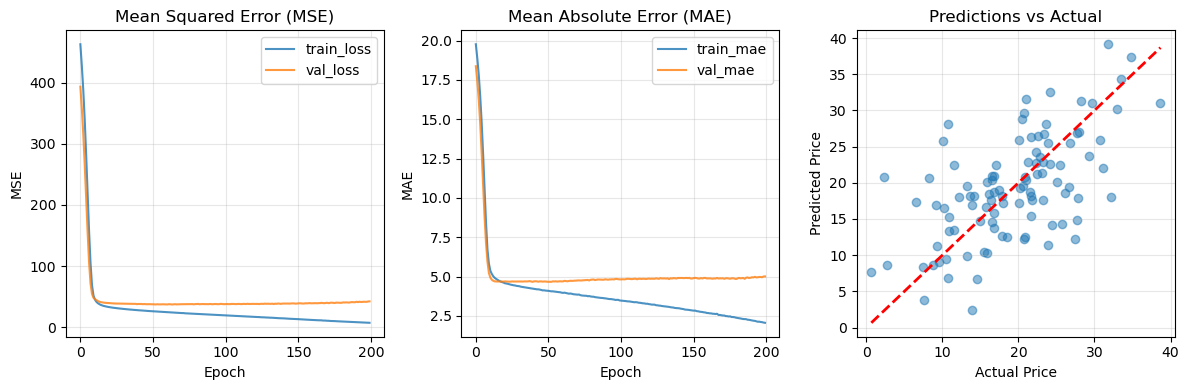


EVALUASI MODEL
Root Mean Squared Error (RMSE): 6.5130
Mean Absolute Error (MAE): 5.0127
R-squared (R²): 0.2487

Interpretasi:
- Model dapat menjelaskan 24.87% variasi dalam harga rumah
- Rata-rata error prediksi: ±5.01 unit harga
- RMSE menunjukkan deviasi standar error: 6.51


In [7]:
# 5. Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(h.history['loss'], label='train_loss', alpha=0.8)
plt.plot(h.history['val_loss'], label='val_loss', alpha=0.8)
plt.legend()
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(h.history['mae'], label='train_mae', alpha=0.8)
plt.plot(h.history['val_mae'], label='val_mae', alpha=0.8)
plt.legend()
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True, alpha=0.3)

# Predictions vs Actual
plt.subplot(1, 3, 3)
pred = model.predict(X_val, verbose=0)
plt.scatter(y_val, pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = model.predict(X_val, verbose=0)
rmse = np.sqrt(mean_squared_error(y_val, pred))
mae = mean_absolute_error(y_val, pred)
r2 = r2_score(y_val, pred)

print("\n" + "="*60)
print("EVALUASI MODEL")
print("="*60)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print("="*60)

print("\nInterpretasi:")
print(f"- Model dapat menjelaskan {r2*100:.2f}% variasi dalam harga rumah")
print(f"- Rata-rata error prediksi: ±{mae:.2f} unit harga")
print(f"- RMSE menunjukkan deviasi standar error: {rmse:.2f}")

## Kesimpulan

1. **Regresi dengan Keras** dapat dilakukan dengan mudah menggunakan Sequential API
2. **Learning Rate** sangat berpengaruh terhadap konvergensi:
   - LR terlalu kecil: konvergensi lambat
   - LR terlalu besar: loss tidak stabil / divergen
   - LR optimal: konvergensi cepat dan stabil
3. **Evaluasi Regresi** menggunakan metrik:
   - MSE/RMSE: mengukur error kuadrat
   - MAE: mengukur error absolut (lebih robust terhadap outlier)
   - R²: mengukur seberapa baik model menjelaskan variasi data
4. **Normalisasi data** penting untuk performa model neural network
5. **Validation set** membantu monitoring overfitting selama training